In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

## Question 1

In [24]:
mu_data=[]
cov_data=[]
X=[]

for i in os.listdir('MNIST_data'):
    dummy=np.zeros((28*28,1), dtype=np.float32)
    dummy_1=[]
    for j in os.listdir('MNIST_data' + "/" + i):
        a=plt.imread('MNIST_data' + "/" + i + "/" + j).reshape(-1,1)
        dummy+=a
        dummy_1.append(a.reshape(1,-1))
    dummy/=len(os.listdir('MNIST_data' + "/" + i))
    mu_data.append(dummy)
    x=np.vstack(dummy_1)
    X.append(x)
    cov_data.append(x.T@x/(len(os.listdir('MNIST_data' + "/" + i))-1))

### Part a) MLE

In [29]:
mu_mle=[]
cov_mle=[]

for i in range(len(X)):
    mu_mle.append(X[0].sum(axis=0).reshape(-1,1)/X[i].shape[0])
    dummy=np.zeros((28*28,28*28))
    for j in range(X[i].shape[0]):
        a=(X[i][j,:].reshape(-1,1)-mu_mle[-1])
        dummy+=a@a.T
    dummy/=(X[i].shape[0]-1)
    cov_mle.append(dummy)

### Part b) MAP

#### Lets consider that prior of mean comes from a multivariate gaussian

#### Parameters: mean vector is mu_mle, covariance matrix is cov_mle

#### Here covariance matrix is near singular (rounded to singular) due to normalized mnist dataset
#### Hence pseudoinverse is used to provide best possible approximation of inverse

In [54]:
mu_map=[]

for i in range(len(X)):
    a=np.linalg.pinv(cov_mle[i])@(X[0].sum(axis=0).reshape(-1,1))
    b=np.linalg.pinv(cov_mle[i])@mu_mle[i]
    c=np.linalg.pinv(np.linalg.pinv(cov_mle[i])*(X[i].shape[0]+1))
    mu_map.append(c@(a+b))

3

### Part c) Sampling

In [95]:
l=[2,4,7]

###### Clearly, Sampling from MAP is better than Sampling from MLE
###### This can be seen as images sampled from MLE seem to be noisier than the ones from MAP
###### This can be said as MAP had mu_mle, cov_mle as multivariate prior parameters
###### This enabled MAP to improvise on MLE estimates and provide lesser noisier estimates  

#### Sampling for MLE

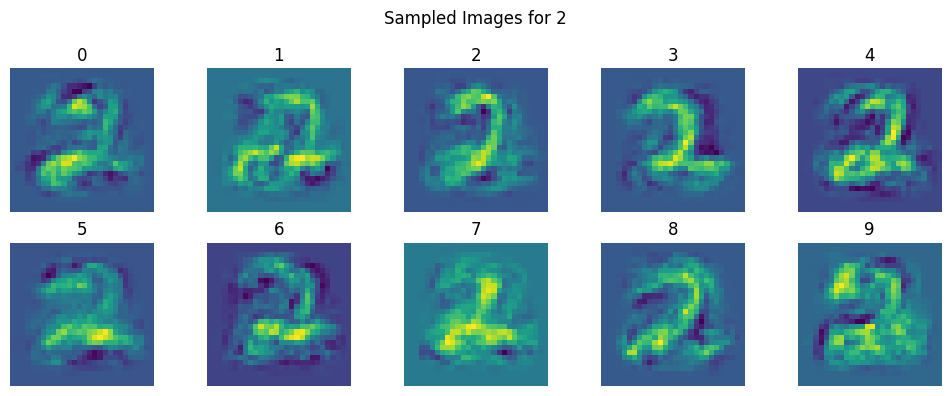

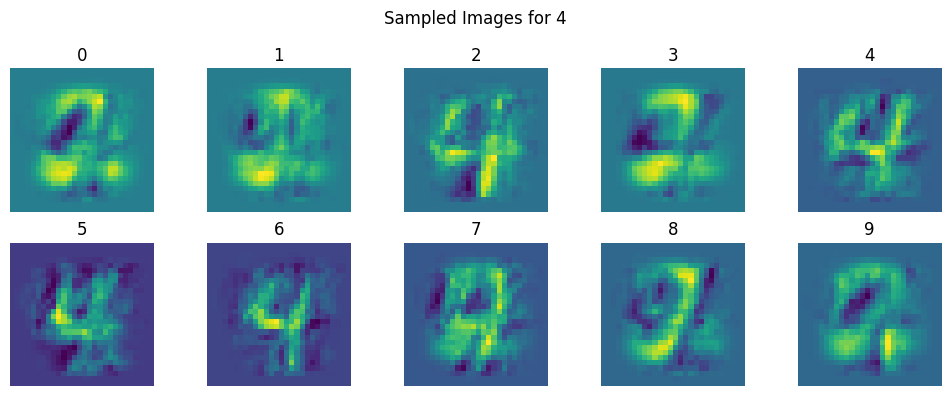

C:\Users\vishn\AppData\Local\Temp\ipykernel_28624\292424618.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  a=np.random.multivariate_normal(mu_mle[i].squeeze(1), cov_mle[i], 10)


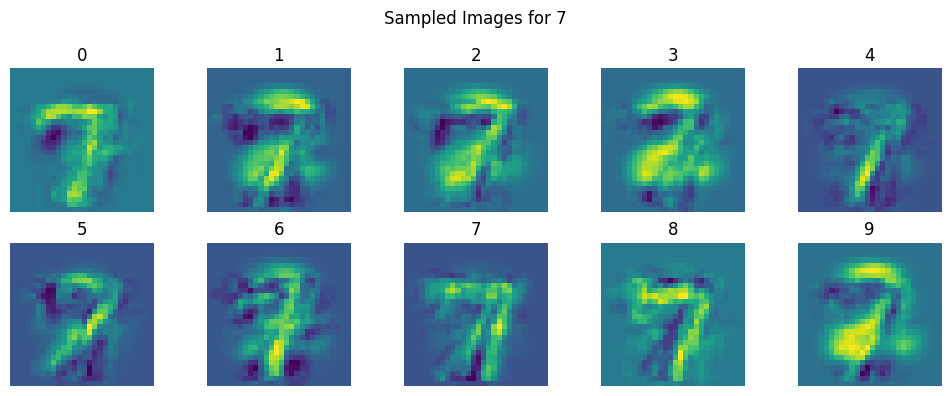

In [96]:
for i in range(len(X)):
    a=np.random.multivariate_normal(mu_mle[i].squeeze(1), cov_mle[i], 10)
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    axes = axes.flatten()
    for j in range(10):
        axes[j].imshow(a[j].reshape(28, 28))
        axes[j].set_title(f'{j}')
        axes[j].axis("off")

    plt.suptitle(f'Sampled Images for {l[i]}')
    plt.tight_layout()
    plt.show()

#### Sampling for MAP

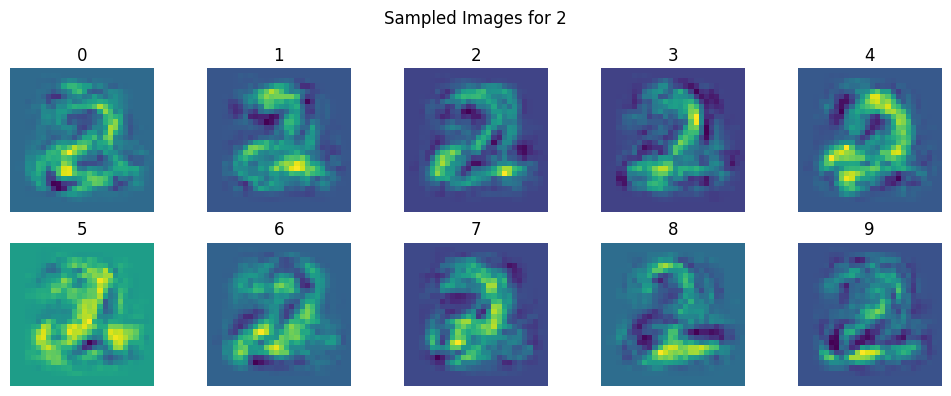

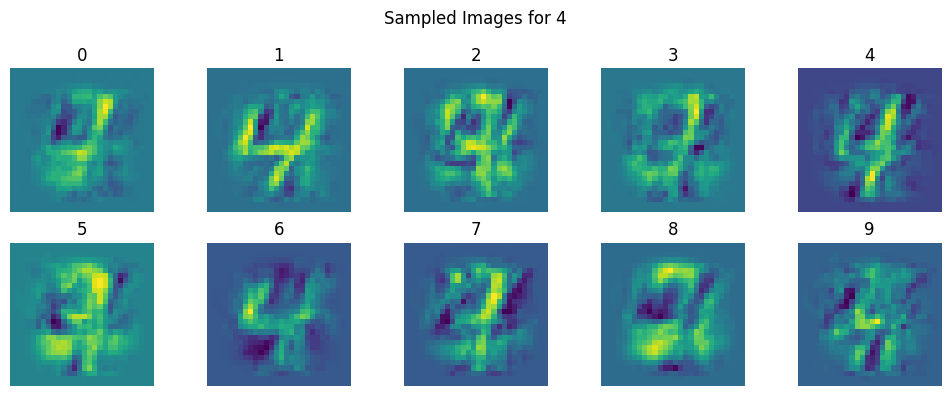

C:\Users\vishn\AppData\Local\Temp\ipykernel_28624\2722904703.py:2: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  a = np.random.multivariate_normal(mu_map[i].squeeze(1), cov_mle[i], 10)


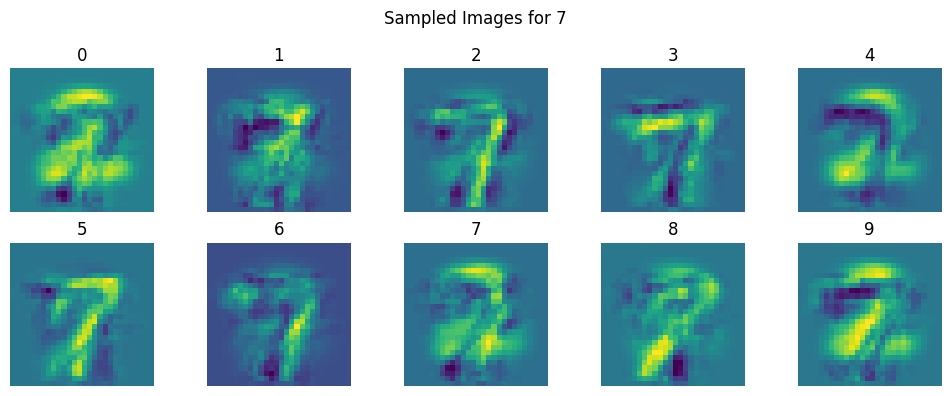

In [97]:
for i in range(len(X)):
    a = np.random.multivariate_normal(mu_map[i].squeeze(1), cov_mle[i], 10)
    fig, axes = plt.subplots(2, 5, figsize=(10, 4))
    axes = axes.flatten()
    for j in range(10):
        axes[j].imshow(a[j].reshape(28, 28))
        axes[j].set_title(f'{j}')
        axes[j].axis("off")

    plt.suptitle(f'Sampled Images for {l[i]}')
    plt.tight_layout()
    plt.show()

## Question 2

In [161]:
data=pd.read_csv('data.csv')

#### Data doesn't have any missing points 

In [ ]:
data.isna().any()

### Part a)

#### 1)

In [265]:
def pol_reg(lr, epoch, deg, l, weigh):

    # Here I am normalising data as its noisy
    x=np.array(data['x'])
    n=x.shape[0]
    mean_x=x.sum()/n
    std_x=((x-mean_x)**2).sum()/n
    x=(x-mean_x)/std_x
    
    t=np.array(data['y'])
    basis = np.arange(0,deg+1)
    
    basis_mat=(x[:, None]**basis).T
    for i in epoch:
        w = np.ones(deg+1)
        for j in range(i):
            y_pred=w.reshape(1,-1)@basis_mat
            y_pred-=t.reshape(1,-1)
            w-=(lr*(y_pred@basis_mat.T)).squeeze(0)
        
        l.append(((w@basis_mat-t)**2).sum())
        
        if epoch[-2]==i:
            plt.scatter(x,t)
            plt.plot(x, w@basis_mat, 'r')
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title(f"Iter Range: {i}")
            plt.legend(["True Data", "Predicted Data"])
            plt.show()
            weigh.append(w)

##### Here I am choosing to go with degree 4

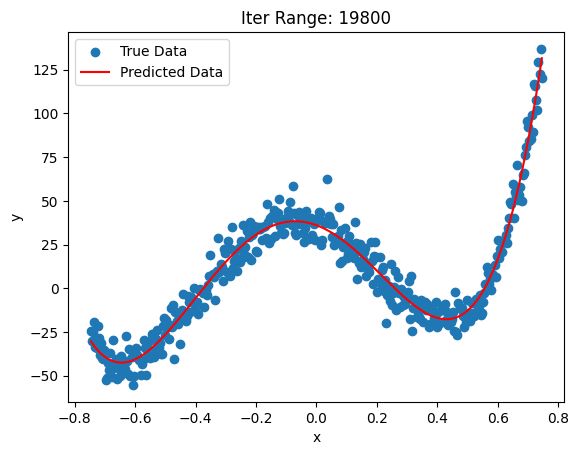

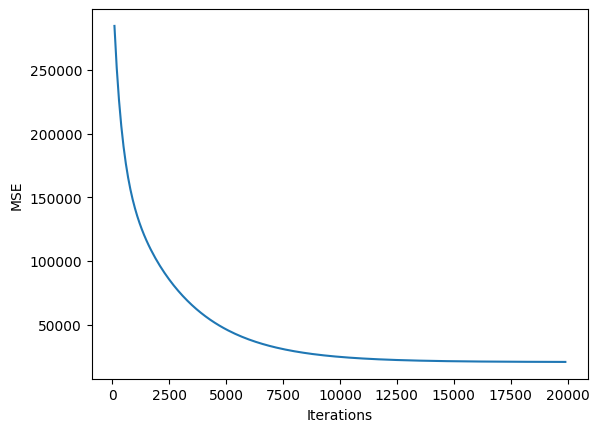

Converged Weights:  [  36.04590715  -63.69648062 -425.68645703  309.33401587  811.21327418]


In [266]:
weight_grad_des=[]

lr    = 1e-3
deg   = 4

step=100
epoch=np.arange(1*step, 200*step, step)

l=[]

pol_reg(lr, epoch, deg, l, weight_grad_des)

plt.plot(epoch, l)
plt.ylabel("MSE")
plt.xlabel("Iterations")
plt.show()

print("Converged Weights: ", weight_grad_des[-1])

#### 2)

##### Now lets try with degrees 2,3,5,6,7

##### Degree 2

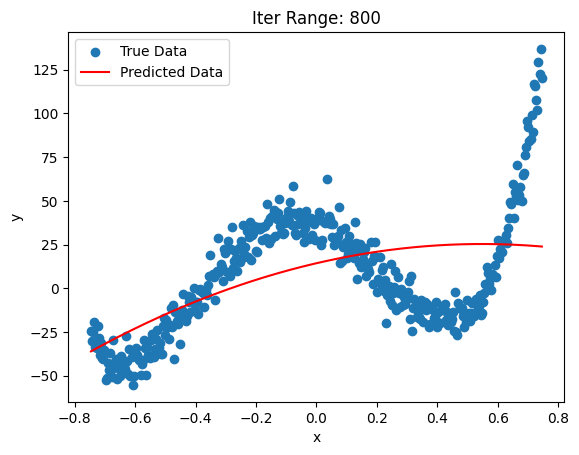

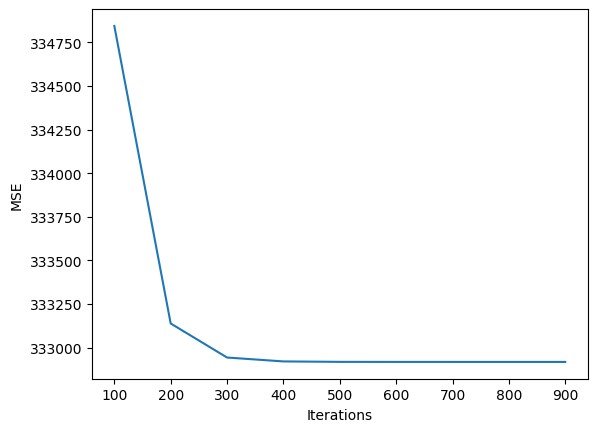

In [267]:
lr    = 1e-3
deg   = 2

step  = 100
epoch = np.arange(1*step, 10*step, step)

l=[]

pol_reg(lr, epoch, deg, l, weight_grad_des)

plt.plot(epoch, l)
plt.ylabel("MSE")
plt.xlabel("Iterations")
plt.show()

##### Degree 3

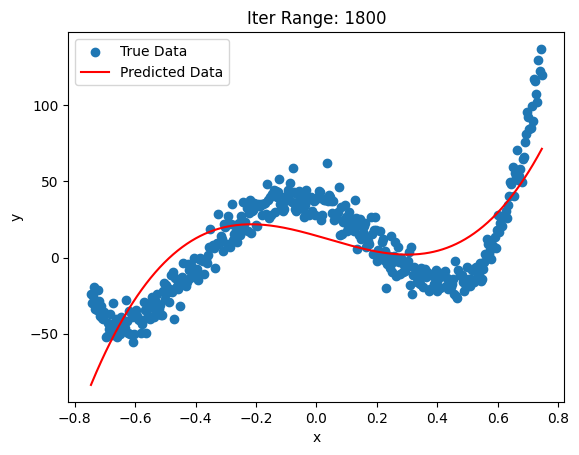

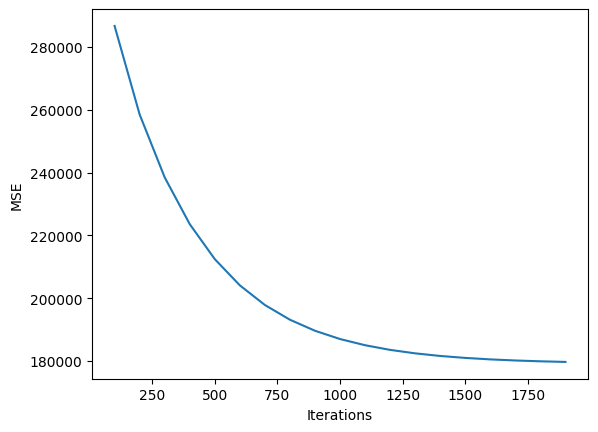

In [268]:
lr    = 1e-3
deg   = 3

step=100
epoch=np.arange(1*step, 20*step, step)

l=[]

pol_reg(lr, epoch, deg, l, weight_grad_des)

plt.plot(epoch, l)
plt.ylabel("MSE")
plt.xlabel("Iterations")
plt.show()

##### Degree 5

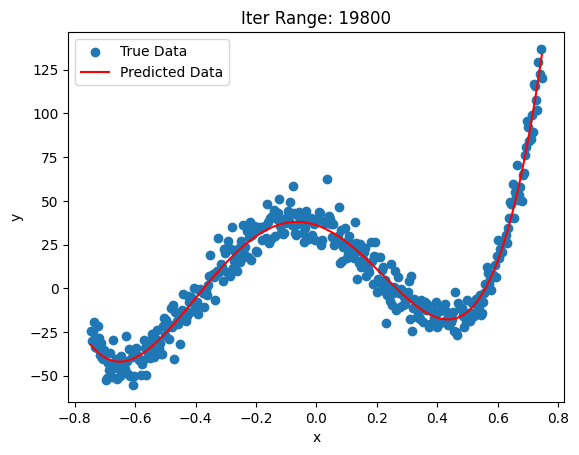

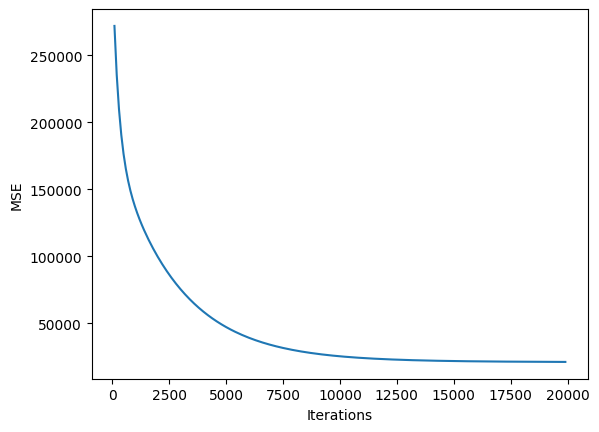

In [269]:
lr    = 1e-3
deg   = 5

step=100
epoch=np.arange(1*step, 200*step, step)

l=[]

pol_reg(lr, epoch, deg, l, weight_grad_des)

plt.plot(epoch, l)
plt.ylabel("MSE")
plt.xlabel("Iterations")
plt.show()

##### Degree 6

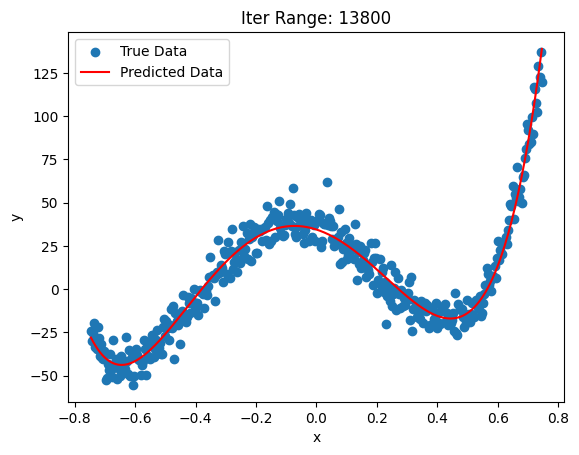

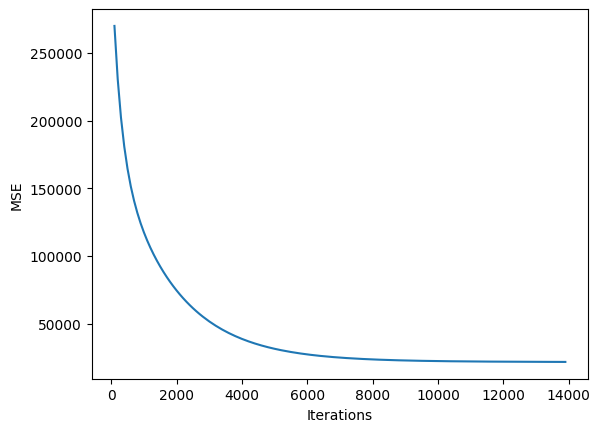

In [270]:
lr    = 1e-3
deg   = 6

step=100
epoch=np.arange(1*step, 140*step, step)

l=[]

pol_reg(lr, epoch, deg, l, weight_grad_des)

plt.plot(epoch, l)
plt.ylabel("MSE")
plt.xlabel("Iterations")
plt.show()

##### Degree 7

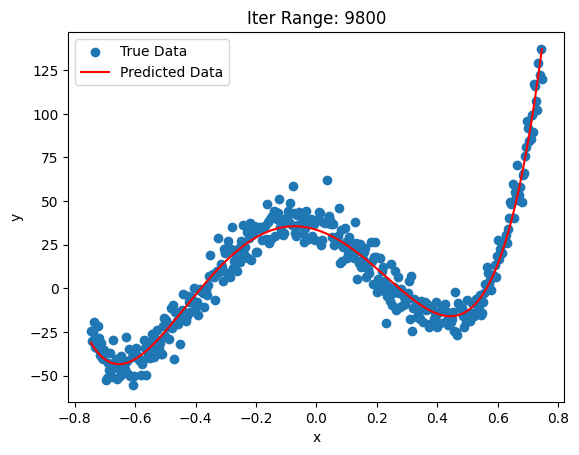

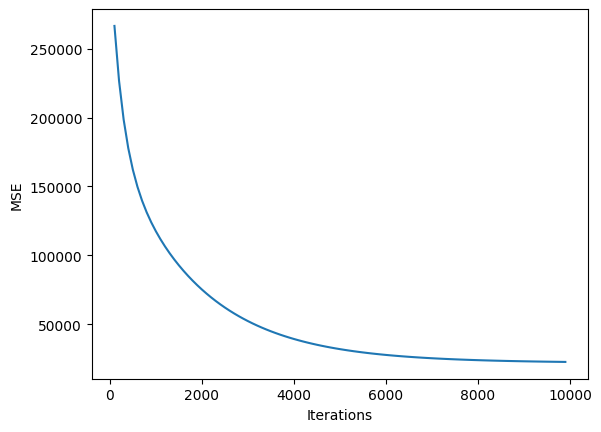

In [271]:
lr    = 1e-3
deg   = 7

step=100
epoch=np.arange(1*step, 100*step, step)

l=[]

pol_reg(lr, epoch, deg, l, weight_grad_des)

plt.plot(epoch, l)
plt.ylabel("MSE")
plt.xlabel("Iterations")
plt.show()

### Part b)

#### 1)

##### Normal Equation for Linear Regression
##### $\theta$ = ($\phi$\$^T$(X)$\phi$(X))$^{-1}$$\phi$(X)y

In [272]:
x=np.array(data['x'])
n=x.shape[0]
mean_x=x.sum()/n
std_x=((x-mean_x)**2).sum()/n
x=(x-mean_x)/std_x

y=np.array(data['y'])
y=y.reshape(-1,1)

In [273]:
d=[2,3,4,5,6,7]
weight_normal=[]

for i in d:
    basis = np.arange(0,i+1)
    basis_mat=(x[:, None]**basis)
    dummy=basis_mat.T@basis_mat
    dummy=np.linalg.inv(dummy)@basis_mat.T
    dummy=dummy@y
    weight_normal.append(dummy.reshape(1,-1))

#### 2)

##### Weights are printed for degrees 2,3,4,5,6,7 respectively

###### Weights obtained from Normal Equation:

In [274]:
weight_normal

[array([[ 14.29813772,  40.18348424, -36.69678247]]),
 array([[ 14.29813772, -63.69648062, -36.69678247, 309.33401587]]),
 array([[  36.66115079,  -63.69648062, -436.26087874,  309.33401587,
          832.88642614]]),
 array([[  36.66115079,  -66.92932863, -436.26087874,  336.29001357,
          832.88642614,  -43.34686172]]),
 array([[  36.43334125,  -66.92932863, -427.71282706,  336.29001357,
          787.06582953,  -43.34686172,   60.03864875]]),
 array([[  36.43334125,  -63.50674655, -427.71282706,  281.24941661,
          787.06582953,  173.01911369,   60.03864875, -239.3274823 ]])]

###### Weights obtained from Gradient Descent

In [275]:
def len_sort(s):
    return s.shape[0]

In [276]:
sorted(weight_grad_des, key=len_sort)

[array([ 14.29686158,  40.18348424, -36.69012624]),
 array([ 14.2981377 , -56.14406082, -36.69678234, 287.27765083]),
 array([  36.04590715,  -63.69648062, -425.68645703,  309.33401587,
         811.21327418]),
 array([  36.04590715,  -57.76812398, -425.68645703,  261.92824915,
         811.21327418,   74.44268622]),
 array([  34.51022678,  -56.40731241, -367.32632624,  250.88250212,
         496.02715328,   91.93922573,  415.00703259]),
 array([  33.55508188,  -54.52958651, -352.20841575,  239.83717203,
         471.91906986,   93.71319699,  400.81010109,   27.31393787])]

##### For degrees 2,3,4,5 weights from Gradient Descent converge to weights from Normal Equation
##### For degrees 6, 7 we can see that some weight components (Gradient Descent) are far compared to their respective weight components (Normal Equation)

##### This shows that the weights didn't converge completely for these higher degrees, although their mse converged
##### This also signals a strong sense of overfitting in these higher degree models, if trained fully 

### Part c)

##### For degrees 2,3 underfiiting is observed. 
##### This can be said as curve didnt fit the data completely, but their mse (from plots) and weights (comparing Normal Equation and Gradient Descent) converged

##### For degrees 6,7 overfitting is observed. 
##### This can be said as curve had fit the data completely (much earlier than degree 4,5), but their weights (comparing Normal Equation and Gradient Descent) didnt converge yet

##### I feel that degree 4,5 consitute best fit polynomials. 
##### This can be said as their curve had fit data, also their mse and weights converged
##### By taking a look of the data, degree 4 seems best fit. But still degree 5 is equally good as it can capture more complex unseen data
##### First Choice should be degree 4, then degree 5 